## Fish

You are given two non-empty arrays A and B consisting of N integers. Arrays A and B represent N voracious fish in a river, ordered downstream along the flow of the river.

The fish are numbered from 0 to N − 1. If P and Q are two fish and P < Q, then fish P is initially upstream of fish Q. Initially, each fish has a unique position.

Fish number P is represented by A[P] and B[P]. Array A contains the sizes of the fish. All its elements are unique. Array B contains the directions of the fish. It contains only 0s and/or 1s, where:

0 represents a fish flowing upstream,<br>
1 represents a fish flowing downstream.

If two fish move in opposite directions and there are no other (living) fish between them, they will eventually meet each other. Then only one fish can stay alive − the larger fish eats the smaller one. More precisely, we say that two fish P and Q meet each other when P < Q, B[P] = 1 and B[Q] = 0, and there are no living fish between them.

After they meet:

If A[P] > A[Q] then P eats Q, and P will still be flowing downstream,<br>
If A[Q] > A[P] then Q eats P, and Q will still be flowing upstream.


We assume that all the fish are flowing at the same speed. That is, fish moving in the same direction never meet. The goal is to calculate the number of fish that will stay alive.

For example, consider arrays A and B such that:

  A[0] = 4    B[0] = 0<br>
  A[1] = 3    B[1] = 1<br>
  A[2] = 2    B[2] = 0<br>
  A[3] = 1    B[3] = 0<br>
  A[4] = 5    B[4] = 0
  
Initially all the fish are alive and all except fish number 1 are moving upstream. Fish number 1 meets fish number 2 and eats it, then it meets fish number 3 and eats it too. Finally, it meets fish number 4 and is eaten by it. The remaining two fish, number 0 and 4, never meet and therefore stay alive.

Write a function:

**def solution(A, B)**

that, given two non-empty arrays A and B consisting of N integers, returns the number of fish that will stay alive.

For example, given the arrays shown above, the function should return 2, as explained above.

Write an efficient algorithm for the following assumptions:

N is an integer within the range [1..100,000];<br>
each element of array A is an integer within the range [0..1,000,000,000];<br>
each element of array B is an integer that can have one of the following values: 0, 1;<br>
the elements of A are all distinct.

In [9]:
%matplotlib inline
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import time as time

import math
import operator

In [10]:
def solution(A,B):
    N = len(A)

    # get running maximum for fishes swimming down (from first to last element)
    current_max = -1
    runmax_down = [0]*N
    for i in range(N):
        if (B[i] == 1):
            current_max = max(current_max, A[i])
        elif (B[i] == 0) and A[i] > current_max:
             current_max = -1
        runmax_down[i] = current_max

    # get running maximum for fishes swimming up (from last to first element)
    current_max = -1
    runmax_up   = [0]*N
    for i in range(N-1,-1,-1):
        if B[i] == 0:
            current_max = max(current_max, A[i])
        elif (B[i] == 1) and A[i] > current_max:
            current_max = -1
        runmax_up[i] = current_max
        
    #print(runmax_up)
    #print(runmax_down)

    # count fish that will survive
    survivor_count = 0
    for i in range(N):
        if B[i] == 1: # downstream swimming fish
            survivor_count += int(A[i] > runmax_up[i]) # survives if they are bigger than all downstream fish swimming upstream
        if B[i] == 0: # upstream swimming fish
            survivor_count += int(A[i] > runmax_down[i]) # survives if they are bigger than all upstream fish swimming downstream

    return survivor_count     
    
        
        
A = [4,3,2,1,5]
B = [0,1,0,0,0]

#A = [4,3,2,1,5,6,4,2]
#B = [0,1,0,0,0,0,1,0]

#A = [5]
#B = [0]

#A = [0,1]
#B = [1,1]

#A = [4,3,7,2,1,5]
#B = [0,1,1,0,0,0]
solution(A,B)


2

Text(0, 0.5, 'time')

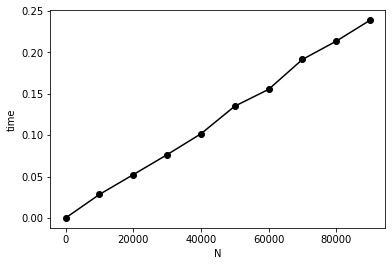

In [11]:
# check time complexity
import time as time

n_range = np.arange(1,100000,10000)

speedA = []
results = []
for N in n_range:
    
    A = np.random.permutation((np.linspace(0,1000000,N)).astype(np.int))
    B = np.random.randint(0,2,N)
    
    t1 = time.time()
    results.append(solution(A,B))
    t2 = time.time()
    speedA.append(t2-t1)

plt.plot(n_range, speedA, 'ko-')
plt.xlabel('N')
plt.ylabel('time')